# Statistics Reference Part 1 - The Basics

## Table of Contents:
* [Types of Skew](#skew)
* [Variance](#Variance)
* [Standard Deviation](#Standard Deviation)
* [Coefficient of Variation](#Coefficient of Variation)
* [Comparing Variance, Standard Deviation and Coefficient of Variation](#comp)
* [Covariance](#Covariance)
* [Correlation Coefficient](#Correlation Coefficient)
* [Numpy/scipy Functions](#Numpy Functions)

| <h3>Population (N)</h3> | <h3>Sample (n)</h3>
| :--------------------------------- | :-
| Collection of all items of interest in the study | A subset of the poulation
| Paramaters | Statistics

## Types of Skew <a class="anchor" id="skew"></a>

Text(0.5,1,'Left Skewed')

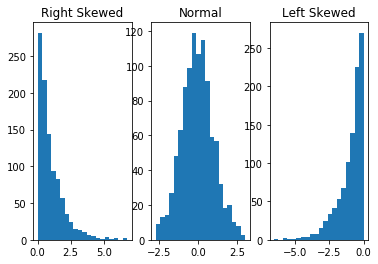

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

right_skewed = np.random.exponential(size = 1000)
normal_skewed = np.random.normal(size=1000)
left_skewed = -np.random.exponential(size=1000)


# plot both together to compare
fig, ax=plt.subplots(1,3)
ax[0].hist(right_skewed, bins=20)
ax[0].set_title("Right Skewed")
ax[1].hist(normal_skewed, bins=20)
ax[1].set_title("Normal")
ax[2].hist(left_skewed, bins=20)
ax[2].set_title("Left Skewed")

In [50]:
from scipy.stats import skew
print('right_skewed skewness:', skew(right_skewed))
print('normal_skewed skewness:', skew(normal_skewed))
print('left_skewed skewness:', skew(left_skewed))

right_skewed skewness: 1.982407837624093
normal_skewed skewness: 0.14004129386642544
left_skewed skewness: -1.7321564324305083


## Variance <a class="anchor" id="Variance"></a>

 - measures the dispersion of a set of data points around their mean.



\begin{align}
\textbf{Population Variance} && \textbf{Sample Variance} \\
               \sigma^2 = \frac{\sum_{i=1}^N (x_i-\mu)^2}{N} &&
               S^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}
\end{align}


In [42]:
def getVariance(data, isSample = True):
    """ Paramaters: 
            - np.array, contains the data
            - isSample, determants to calculate sample or population variance
        Returns: Variance"""
    
    mean = data.mean()
    numerator = 0
    
    for num in data:
        numerator += (num - mean)**2
    
    if isSample:
        variance = numerator/data.size - 1
    else :
        variance = numerator/data.size
    
    return variance

In [10]:
variance = getVariance(right_skewed)
print("Variance:",variance)

Variance: 1.3407241790379374


### Standard Deviation <a class="anchor" id="Standard Deviation"></a>

\begin{align}
\textbf{Population Standard Deviation} && \textbf{Sample Standard Deviation} \\
               \sigma = \sqrt{\sigma^2} &&
               S = \sqrt{S^2}
\end{align}

In [17]:
standard_deviation = np.sqrt(getVariance(right_skewed))
print('Standard Deviation:', standard_deviation)

Standard Deviation: 1.157896445731628


### Coefficient of Variation  <a class="anchor" id="Coefficient of Variation"></a>

- Reletive Standart Deviation

\begin{align}
\textbf{Population Standard Deviation} && \textbf{Sample Standard Deviation} \\
               C_v = \frac{\sigma}{\mu} &&
               \hat{C_v} = \frac{S}{\bar{x}}
\end{align}

In [12]:
coefficient_of_variation = np.sqrt(getVariance(right_skewed))/right_skewed.mean()
print("Coefficient of Variation :",coefficient_of_variation)

Coefficient of Variation : 1.0569326921036846


### Comparing Variance, Standard Deviation and Coefficient of Variation <a class="anchor" id="comp"></a>

#### Pizza Slice Price in New York

In [13]:
# Generate some data
store = np.arange(10) + 1
dollor = np.random.uniform(low=2, high=7, size=(10,))
peso = dollor * 18.18
data = np.concatenate(([store], [dollor], [peso]), axis = 0)

In [14]:
print (pd.DataFrame(np.round(data.T,2), columns=['Store',"Dollor","Peso"]))

   Store  Dollor    Peso
0    1.0    3.17   57.62
1    2.0    2.23   40.50
2    3.0    6.89  125.33
3    4.0    6.89  125.18
4    5.0    5.24   95.23
5    6.0    6.34  115.28
6    7.0    5.98  108.65
7    8.0    3.56   64.80
8    9.0    5.95  108.23
9   10.0    3.97   72.25


In [15]:
# Calculate mean, var, std, and cov and store ina pandas df to be printed
means = np.array([dollor.mean(),peso.mean()])
variances = np.array([getVariance(dollor),getVariance(peso)])
standard_deviations = np.sqrt(variances)
coefficient_of_variation = np.array([standard_deviations[0]/dollor.mean(), standard_deviations[1]/peso.mean()])

comp = np.concatenate(([means], [variances], [standard_deviations], [coefficient_of_variation]), axis = 0)

print(pd.DataFrame(np.round(comp,2), columns=["Dollor","Peso"], index=['Mean','Variation','Standard Deviation','Coefficient of Variation']))
print("\n*Notice how the coefficient of Variation are the same value between dollors and pesos.")

                          Dollor    Peso
Mean                        5.02   91.31
Variation                   2.50  826.40
Standard Deviation          1.58   28.75
Coefficient of Variation    0.31    0.31

*Notice how the coefficient of Variation are the same value between dollors and pesos.


### Covariance  <a class="anchor" id="Covariance"></a>

 - Gives a scence of direction the two varables are moving.

\begin{align}
\textbf{Population Variance} && \textbf{Sample Variance} \\
               \sigma_{xy} = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i-\bar{y})}{N} &&
               S_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{n-1}
\end{align}

Text(0,0.5,'y_data')

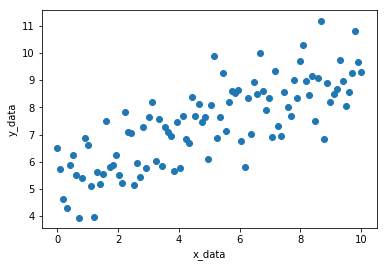

In [22]:
# Generate some example data
x_data = np.linspace(0.0,10.0,100)
noise = np.random.randn(len(x_data))
y_data =  (0.5 * x_data ) + 5 + noise

# Plot the data
plt.scatter(x_data,y_data)
plt.xlabel('x_data')
plt.ylabel('y_data')

In [38]:
def get_covariance(x_data, y_data, isSample = True):
    """ Paramaters: 
            - x and y data as a np.array
            - isSample, determants to calculate sample or population variance
        Returns: covariance"""
    
    # check to see if x_data and y_data are same size
    if x_data.shape != y_data.shape:
        raise ValueError('The shape of x and y does not match.')
     
    numerator = 0
    
    for x,y in zip(x_data,y_data):
        numerator += (x - x_data.mean()) * (y - y_data.mean())
        
    if isSample:
        return numerator / (len(x_data) - 1)
    else:
        return numerator / len(x_data)
        

In [39]:
# Calculate the Covariance
cov = get_covariance(x_data, y_data)
print("The covariance of x_data and y_data is:", cov)

The covariance of x_data and y_data is: 3.5421960866656734


### Correlation Coefficient <a class="anchor" id="Correlation Coefficient"></a>

 - Nomalizes covariance

\begin{align}
\textbf{Populationv Correlation Coefficient} && \textbf{Sample Correlation Coefficient} \\
               \frac{Cov(x,y)}{Stdev(x)*Stdev(y)} = \frac{\sigma_{xy}}{\sigma_x*\sigma_y} &&
               \frac{Cov(x,y)}{Stdev(x)*Stdev(y)} = \frac{S_{xy}}{S_x*S_y}
\end{align}

In [43]:
# Calculate the Correlation Coefficient 
cov = get_covariance(x_data, y_data)
correlation_coefficient = cov/(np.sqrt(getVariance(x_data)) * np.sqrt(getVariance(y_data)))
print("The Correlation Coefficient of x_data and y_data is:", correlation_coefficient)

The covariance of x_data and y_data is: 1.1088591982273108


### Numpy Functions  <a class="anchor" id="Numpy Functions"></a>

 - Skew [scipy.stats.skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)
 - Variance [numpy.var](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
 - Standard Deviation [numpy.std](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html)
 -  Coefficient of Variation [scipy.stats.variation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html)
 - Covariance [numpy.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)
 -  Correlation Coefficient[numpy.corrcoef](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html)